## Import

In [1]:
import os
import cv2
import random
import shutil
import numpy as np
import PIL
from matplotlib import pyplot as plt
from copy import deepcopy
import serial
import time
import pandas as pd
import json

In [6]:
class rubik:
    _map_st = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
    cube = []
    def __init__(self, robot=False):
        self.robot = robot
        self.moveslist = ""
        self._l = [0, 31, 2, 3, 34, 5, 6, 37, 8, 9, 10, 1, 12, 13, 4, 15, 16, 7, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 51, 32, 33, 54, 35, 36, 57, 38, 39, 40, 47, 44, 41, 48, 45, 42, 49, 46, 43, 50, 11, 52, 53, 14, 55, 56, 17, 58, 59]
        self._r = [0, 1, 2, 13, 4, 5, 16, 7, 8, 19, 10, 11, 12, 53, 14, 15, 56, 17, 18, 59, 20, 27, 24, 21, 28, 25, 22, 29, 26, 23, 30, 31, 32, 3, 34, 35, 6, 37, 38, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 33, 54, 55, 36, 57, 58, 39]
        self._u = [0, 21, 22, 23, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 59, 58, 57, 24, 25, 26, 27, 28, 29, 30, 37, 34, 31, 38, 35, 32, 39, 36, 33, 40, 1, 2, 3, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 43, 42, 41]
        self._d = [0, 1, 2, 3, 4, 5, 6, 47, 48, 49, 10, 17, 14, 11, 18, 15, 12, 19, 16, 13, 20, 21, 22, 23, 24, 25, 26, 7, 8, 9, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 53, 52, 51, 50, 29, 28, 27, 54, 55, 56, 57, 58, 59]
        self._f = [0, 7, 4, 1, 8, 5, 2, 9, 6, 3, 10, 27, 24, 21, 14, 15, 16, 17, 18, 19, 20, 37, 22, 23, 38, 25, 26, 39, 28, 29, 30, 31, 32, 33, 34, 35, 36, 49, 46, 43, 40, 41, 42, 11, 44, 45, 12, 47, 48, 13, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
        self._b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 41, 44, 47, 20, 21, 22, 19, 24, 25, 18, 27, 28, 17, 30, 23, 26, 29, 34, 35, 36, 37, 38, 39, 40, 33, 42, 43, 32, 45, 46, 31, 48, 49, 50, 57, 54, 51, 58, 55, 52, 59, 56, 53]
        self._x = [0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 51, 52, 53, 54, 55, 56, 57, 58, 59, 20, 27, 24, 21, 28, 25, 22, 29, 26, 23, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 43, 46, 49, 42, 45, 48, 41, 44, 47, 50, 31, 32, 33, 34, 35, 36, 37, 38, 39]
        self._y = [0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 10, 13, 16, 19, 12, 15, 18, 11, 14, 17, 20, 59, 58, 57, 56, 55, 54, 53, 52, 51, 30, 37, 34, 31, 38, 35, 32, 39, 36, 33, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41]
        self._z = [0, 7, 4, 1, 8, 5, 2, 9, 6, 3, 10, 27, 24, 21, 28, 25, 22, 29, 26, 23, 20, 37, 34, 31, 38, 35, 32, 39, 36, 33, 30, 47, 44, 41, 48, 45, 42, 49, 46, 43, 40, 17, 14, 11, 18, 15, 12, 19, 16, 13, 50, 53, 56, 59, 52, 55, 58, 51, 54, 57]
        self._L = [0, 11, 2, 3, 14, 5, 6, 17, 8, 9, 10, 51, 12, 13, 54, 15, 16, 57, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 32, 33, 4, 35, 36, 7, 38, 39, 40, 43, 46, 49, 42, 45, 48, 41, 44, 47, 50, 31, 52, 53, 34, 55, 56, 37, 58, 59]
        self._R = [0, 1, 2, 33, 4, 5, 36, 7, 8, 39, 10, 11, 12, 3, 14, 15, 6, 17, 18, 9, 20, 23, 26, 29, 22, 25, 28, 21, 24, 27, 30, 31, 32, 53, 34, 35, 56, 37, 38, 59, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 13, 54, 55, 16, 57, 58, 19]
        self._U = [0, 41, 42, 43, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 24, 25, 26, 27, 28, 29, 30, 33, 36, 39, 32, 35, 38, 31, 34, 37, 40, 59, 58, 57, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 23, 22, 21]
        self._D = [0, 1, 2, 3, 4, 5, 6, 27, 28, 29, 10, 13, 16, 19, 12, 15, 18, 11, 14, 17, 20, 21, 22, 23, 24, 25, 26, 53, 52, 51, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 7, 8, 9, 50, 49, 48, 47, 54, 55, 56, 57, 58, 59]
        self._F = [0, 3, 6, 9, 2, 5, 8, 1, 4, 7, 10, 43, 46, 49, 14, 15, 16, 17, 18, 19, 20, 13, 22, 23, 12, 25, 26, 11, 28, 29, 30, 31, 32, 33, 34, 35, 36, 21, 24, 27, 40, 41, 42, 39, 44, 45, 38, 47, 48, 37, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
        self._B = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 29, 26, 23, 20, 21, 22, 31, 24, 25, 32, 27, 28, 33, 30, 47, 44, 41, 34, 35, 36, 37, 38, 39, 40, 17, 42, 43, 18, 45, 46, 19, 48, 49, 50, 53, 56, 59, 52, 55, 58, 51, 54, 57]
        self._X = [0, 31, 32, 33, 34, 35, 36, 37, 38, 39, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 23, 26, 29, 22, 25, 28, 21, 24, 27, 30, 51, 52, 53, 54, 55, 56, 57, 58, 59, 40, 47, 44, 41, 48, 45, 42, 49, 46, 43, 50, 11, 12, 13, 14, 15, 16, 17, 18, 19]
        self._Y = [0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 10, 17, 14, 11, 18, 15, 12, 19, 16, 13, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 30, 33, 36, 39, 32, 35, 38, 31, 34, 37, 40, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 29, 28, 27, 26, 25, 24, 23, 22, 21]
        self._Z = [0, 3, 6, 9, 2, 5, 8, 1, 4, 7, 10, 43, 46, 49, 42, 45, 48, 41, 44, 47, 20, 13, 16, 19, 12, 15, 18, 11, 14, 17, 30, 23, 26, 29, 22, 25, 28, 21, 24, 27, 40, 33, 36, 39, 32, 35, 38, 31, 34, 37, 50, 57, 54, 51, 58, 55, 52, 59, 56, 53]

        self.calib = None
        self.reset()

        
    def reset(self):
        self.cube = deepcopy(self._map_st)

    def print(self):
        print(self.__str__())

    def __repr__(self):
        c = self.cube
        def C(n): return clr[c[n]].replace("x ", str(c[n]+100)[-2:])
        R= "\033[41m x \033[0m"
        G= "\033[42m x \033[0m"
        Y= "\033[43m x \033[0m"
        B= "\033[44m x \033[0m"
        O= "\033[40m x \033[0m"
        W= "\033[47m x \033[0m"

        clr = [W]*10 + [R]*10 + [B]*10 + [O]*10 + [G]*10 + [Y]*10
        sp = " "*9

        ret = ""
        ret+= (f"{sp}{C(31)}{C(32)}{C(33)}{sp}") + "\n"
        ret+= (f"{sp}{C(34)}{C(35)}{C(36)}{sp}") + "\n"
        ret+= (f"{sp}{C(37)}{C(38)}{C(39)}{sp}") + "\n"
        for i in [41,42,43,1,2,3,21,22,23]:
            ret+= (f"{C(i)}")
        ret+= "\n"
        for i in [44,45,46,4,5,6,24,25,26]:
            ret+= (f"{C(i)}")
        ret+= "\n"
        for i in [47,48,49,7,8,9,27,28,29]:
            ret+= (f"{C(i)}")
        ret+= "\n"
        ret+= (f"{sp}{C(11)}{C(12)}{C(13)}{sp}") + "\n"
        ret+= (f"{sp}{C(14)}{C(15)}{C(16)}{sp}") + "\n"
        ret+= (f"{sp}{C(17)}{C(18)}{C(19)}{sp}") + "\n"
        ret+= (f"{sp}{C(51)}{C(52)}{C(53)}{sp}") + "\n"
        ret+= (f"{sp}{C(54)}{C(55)}{C(56)}{sp}") + "\n"
        ret+= (f"{sp}{C(57)}{C(58)}{C(59)}{sp}") + "\n"
        return ret

    def l(self):
        self.cube = [self.cube[i] for i in self._l]
        self.moveslist += 'l '
    def r(self):
        self.cube = [self.cube[i] for i in self._r]
        self.moveslist += 'r '
    def u(self):
        self.cube = [self.cube[i] for i in self._u]
        self.moveslist += 'u '
    def d(self):
        self.cube = [self.cube[i] for i in self._d]
        self.moveslist += 'd '
    def f(self):
        self.cube = [self.cube[i] for i in self._f]
        self.moveslist += 'f '
    def b(self):
        self.cube = [self.cube[i] for i in self._b]
        self.moveslist += 'b '
    def x(self):
        self.cube = [self.cube[i] for i in self._x]
        self.moveslist += 'x '
    def y(self):
        self.cube = [self.cube[i] for i in self._y]
        self.moveslist += 'y '
    def z(self):
        self.cube = [self.cube[i] for i in self._z]
        self.moveslist += 'z '
    def L(self):
        self.cube = [self.cube[i] for i in self._L]
        self.moveslist += 'L '
    def R(self):
        self.cube = [self.cube[i] for i in self._R]
        self.moveslist += 'R '
    def U(self):
        self.cube = [self.cube[i] for i in self._U]
        self.moveslist += 'U '
    def D(self):
        self.cube = [self.cube[i] for i in self._D]
        self.moveslist += 'D '
    def F(self):
        self.cube = [self.cube[i] for i in self._F]
        self.moveslist += 'F '
    def B(self):
        self.cube = [self.cube[i] for i in self._B]
        self.moveslist += 'B '
    def X(self):
        self.cube = [self.cube[i] for i in self._X]
        self.moveslist += 'X '
    def Y(self):
        self.cube = [self.cube[i] for i in self._Y]
        self.moveslist += 'Y '
    def Z(self):
        self.cube = [self.cube[i] for i in self._Z]
        self.moveslist += 'Z '


    def move(self, m, delay=0):
        ml = m.split()
        #print (ml)
        for i in ml:
            if i == "l": self.l()
            elif i == "r": self.r()
            elif i == "u": self.u()
            elif i == "d": self.d()
            elif i == "f": self.f()
            elif i == "b": self.b()
            elif i == "L": self.L()
            elif i == "R": self.R()
            elif i == "U": self.U()
            elif i == "D": self.D()
            elif i == "F": self.F()
            elif i == "B": self.B()
            elif i == "x": self.x()
            elif i == "y": self.y()
            elif i == "z": self.z()
            elif i == "X": self.X()
            elif i == "Y": self.Y()
            elif i == "Z": self.Z()

            else: print("error")
            #self.print()
          
        if self.robot:
            self.sendserial(m, delay=delay)
        
        return (len(ml))


    tperm = "r u R U R f r r U R U r u R F"
    yperm = "r U R U r u R F r u R U R f r"

    def scramble(self, num =20):
        moves = ["R", "r", "L", "l", "F", "f", "B", "b", "U", "u", "D", "d"]
        orderlist = [moves[random.randint(0,11)] for i in range(num)]
        order = " ".join(orderlist)
        self.move(order)
        print (order)

    def reorrient(self):
        for i in (15,25,35,45,55):
            if self.cube[i] == 5:
                if i == 15:
                    self.x()
                elif i == 25:
                    self.y()
                elif i == 35:
                    self.X()
                elif i == 45:
                    self.Y()
                elif i == 55:
                    self.Y()
        for i in (25,35,45):
            if self.cube[i] == 15:
                if i == 25:
                    self.z()
                elif i == 35:
                    self.z()
                    self.z()
                elif i == 45:
                    self.Z()

    def movereverse(self, m):
        ml = m.split()
        mlreverse = []
        for i in range(len(ml)):
            mlreverse.append(ml[len(ml) - i-1])
        #print (ml)
        for i in mlreverse:
            if i ==   "l": self.L()
            elif i == "r": self.R()
            elif i == "u": self.U()
            elif i == "d": self.D()
            elif i == "f": self.F()
            elif i == "b": self.B()
            elif i == "L": self.l()
            elif i == "R": self.r()
            elif i == "U": self.u()
            elif i == "D": self.d()
            elif i == "F": self.f()
            elif i == "B": self.b()
            elif i == "X": self.x()
            elif i == "Y": self.y()
            elif i == "Z": self.z()
            elif i == "x": self.X()
            elif i == "y": self.Y()
            elif i == "z": self.Z()

            else: print("error", ml, mlreverse)
            #self.print()
        return (len(ml))

    edge_setup_moves = {
        2: "r X D l l",
        4: "L",
        6: "u Y u Y l",
        8: "r X d l l",
        12: "D l l",
        14: "l l",
        16: "d d l l",
        18: "d l l",
        #22: "buffer piece",
        24: "U y L",
        26: "u Y l",
        28: "d d L U y l",
        32: "r r x x D l l",
        34: "",
        #36: "buffer piece",
        38: "r r X X d l l",
        42: "l U y l",
        44: "u Y L",
        46: "U y l",
        48: "L U y l",
        52: "R x D l l",
        54: "l",
        56: "u u Y Y L",
        58: "R x d l l"
    }

    corner_setup_moves = {
        #31: "buffer piece",
        33: "r r",
        39: "f f d",
        37: "f f",
        #41: "buffer piece",
        43: "F d",
        49: "F",
        47: "D r",
        1: "f R",
        3: "R",
        9: "F R",
        7: "f f R",
        21: "f",
        23: "R f",
        29: "r r f",
        27: "r f",
        59: "r D",
        #57: "buffer piece",
        51: "d F",
        53: "r",
        11: "d",
        13: "",
        19: "D",
        17: "d d"
    }

    def nrml(self, movelist): # "non rational moves list"
        facevalues = {
            5 : 'w',
            15 : 'r',
            25 : 'b',
            35 : 'o',
            45 : 'g',
            55 : 'y'}
        ret = ""
        movelist = movelist.split()
        ff = facevalues[self.cube[5]]   # current face
        df = facevalues[self.cube[15]] # current bottom face

        m = {'w': {'r': {'r': 'r','l': 'l','f': 'f','b': 'b','u': 'u','d': 'd','R': 'R','L': 'L','F': 'F','B': 'B','U': 'U','D': 'D'},'o': {'r': 'l','l': 'r','f': 'f','b': 'b','u': 'd','d': 'u','R': 'L','L': 'R','F': 'F','B': 'B','U': 'D','D': 'U'},'b': {'r': 'u','l': 'd','f': 'f','b': 'b','u': 'l','d': 'r','R': 'U','L': 'D','F': 'F','B': 'B','U': 'L','D': 'R'},'g': {'r': 'd','l': 'u','f': 'f','b': 'b','u': 'r','d': 'l','R': 'D','L': 'U','F': 'F','B': 'B','U': 'R','D': 'L'}},
            'y': {'r': {'r': 'l','l': 'r','f': 'b','b': 'f','u': 'u','d': 'd','R': 'L','L': 'R','F': 'B','B': 'F','U': 'U','D': 'D'},'o': {'r': 'r','l': 'l','f': 'b','b': 'f','u': 'd','d': 'u','R': 'R','L': 'L','F': 'B','B': 'F','U': 'D','D': 'U'},'b': {'r': 'd','l': 'u','f': 'b','b': 'f','u': 'l','d': 'r','R': 'D','L': 'U','F': 'B','B': 'F','U': 'L','D': 'R'},'g': {'r': 'u','l': 'd','f': 'b','b': 'f','u': 'r','d': 'l','R': 'U','L': 'D','F': 'B','B': 'F','U': 'R','D': 'L'}},
            'r': {'w': {'r': 'l','l': 'r','f': 'd','b': 'u','u': 'b','d': 'f','R': 'L','L': 'R','F': 'D','B': 'U','U': 'B','D': 'F'},'y': {'r': 'r','l': 'l','f': 'd','b': 'u','u': 'f','d': 'b','R': 'R','L': 'L','F': 'D','B': 'U','U': 'F','D': 'B'},'b': {'r': 'f','l': 'b','f': 'd','b': 'u','u': 'l','d': 'r','R': 'F','L': 'B','F': 'D','B': 'U','U': 'L','D': 'R'},'g': {'r': 'b','l': 'f','f': 'd','b': 'u','u': 'r','d': 'l','R': 'B','L': 'F','F': 'D','B': 'U','U': 'R','D': 'L'}},
            'o': {'w': {'r': 'r','l': 'l','f': 'u','b': 'd','u': 'b','d': 'f','R': 'R','L': 'L','F': 'U','B': 'D','U': 'B','D': 'F'},'y': {'r': 'l','l': 'r','f': 'u','b': 'd','u': 'f','d': 'b','R': 'L','L': 'R','F': 'U','B': 'D','U': 'F','D': 'B'},'b': {'r': 'b','l': 'f','f': 'u','b': 'd','u': 'l','d': 'r','R': 'B','L': 'F','F': 'U','B': 'D','U': 'L','D': 'R'},'g': {'r': 'f','l': 'b','f': 'u','b': 'd','u': 'r','d': 'l','R': 'F','L': 'B','F': 'U','B': 'D','U': 'R','D': 'L'}},
            'b': {'w': {'r': 'd','l': 'u','f': 'r','b': 'l','u': 'b','d': 'f','R': 'D','L': 'U','F': 'R','B': 'L','U': 'B','D': 'F'},'y': {'r': 'u','l': 'd','f': 'r','b': 'l','u': 'f','d': 'b','R': 'U','L': 'D','F': 'R','B': 'L','U': 'F','D': 'B'},'r': {'r': 'b','l': 'f','f': 'r','b': 'l','u': 'u','d': 'd','R': 'B','L': 'F','F': 'R','B': 'L','U': 'U','D': 'D'},'o': {'r': 'f','l': 'b','f': 'r','b': 'l','u': 'd','d': 'u','R': 'F','L': 'B','F': 'R','B': 'L','U': 'D','D': 'U'}},
            'g': {'w': {'r': 'u','l': 'd','f': 'l','b': 'r','u': 'b','d': 'f','R': 'U','L': 'D','F': 'L','B': 'R','U': 'B','D': 'F'},'y': {'r': 'd','l': 'u','f': 'l','b': 'r','u': 'f','d': 'b','R': 'D','L': 'U','F': 'L','B': 'R','U': 'F','D': 'B'},'r': {'r': 'f','l': 'b','f': 'l','b': 'r','u': 'u','d': 'd','R': 'F','L': 'B','F': 'L','B': 'R','U': 'U','D': 'D'},'o': {'r': 'b','l': 'f','f': 'l','b': 'r','u': 'd','d': 'u','R': 'B','L': 'F','F': 'L','B': 'R','U': 'D','D': 'U'}}}

        n1 = {'w': {'r': {'x': 'r', 'y': 'b', 'z': 'w', 'X': 'o', 'Y': 'g', 'Z': 'w'},'o': {'x': 'o', 'y': 'g', 'z': 'w', 'X': 'r', 'Y': 'b', 'Z': 'w'},'b': {'x': 'b', 'y': 'o', 'z': 'w', 'X': 'g', 'Y': 'r', 'Z': 'w'},'g': {'x': 'g', 'y': 'r', 'z': 'w', 'X': 'b', 'Y': 'o', 'Z': 'w'}},
            'y': {'r': {'x': 'r', 'y': 'g', 'z': 'y', 'X': 'o', 'Y': 'b', 'Z': 'y'},'o': {'x': 'o', 'y': 'b', 'z': 'y', 'X': 'r', 'Y': 'g', 'Z': 'y'},'b': {'x': 'b', 'y': 'r', 'z': 'y', 'X': 'g', 'Y': 'o', 'Z': 'y'},'g': {'x': 'g', 'y': 'o', 'z': 'y', 'X': 'b', 'Y': 'r', 'Z': 'y'}},
            'r': {'w': {'x': 'w', 'y': 'g', 'z': 'r', 'X': 'y', 'Y': 'b', 'Z': 'r'},'y': {'x': 'y', 'y': 'b', 'z': 'r', 'X': 'w', 'Y': 'g', 'Z': 'r'},'b': {'x': 'b', 'y': 'w', 'z': 'r', 'X': 'g', 'Y': 'y', 'Z': 'r'},'g': {'x': 'g', 'y': 'y', 'z': 'r', 'X': 'b', 'Y': 'w', 'Z': 'r'}},
            'o': {'w': {'x': 'w', 'y': 'b', 'z': 'o', 'X': 'y', 'Y': 'g', 'Z': 'o'},'y': {'x': 'y', 'y': 'g', 'z': 'o', 'X': 'w', 'Y': 'b', 'Z': 'o'},'b': {'x': 'b', 'y': 'y', 'z': 'o', 'X': 'g', 'Y': 'w', 'Z': 'o'},'g': {'x': 'g', 'y': 'w', 'z': 'o', 'X': 'b', 'Y': 'y', 'Z': 'o'}},
            'b': {'w': {'x': 'w', 'y': 'r', 'z': 'b', 'X': 'y', 'Y': 'o', 'Z': 'b'},'y': {'x': 'y', 'y': 'o', 'z': 'b', 'X': 'w', 'Y': 'r', 'Z': 'b'},'r': {'x': 'r', 'y': 'y', 'z': 'b', 'X': 'o', 'Y': 'w', 'Z': 'b'},'o': {'x': 'o', 'y': 'w', 'z': 'b', 'X': 'r', 'Y': 'y', 'Z': 'b'}},
            'g': {'w': {'x': 'w', 'y': 'o', 'z': 'g', 'X': 'y', 'Y': 'r', 'Z': 'g'},'y': {'x': 'y', 'y': 'r', 'z': 'g', 'X': 'w', 'Y': 'o', 'Z': 'g'},'r': {'x': 'r', 'y': 'w', 'z': 'g', 'X': 'o', 'Y': 'y', 'Z': 'g'},'o': {'x': 'o', 'y': 'y', 'z': 'g', 'X': 'r', 'Y': 'w', 'Z': 'g'}}}

        n2 = {'w': {'r': {'x': 'y', 'y': 'r', 'z': 'b', 'X': 'w', 'Y': 'r', 'Z': 'g'},'o': {'x': 'y', 'y': 'o', 'z': 'g', 'X': 'w', 'Y': 'o', 'Z': 'b'},'b': {'x': 'y', 'y': 'b', 'z': 'o', 'X': 'w', 'Y': 'b', 'Z': 'r'},'g': {'x': 'y', 'y': 'g', 'z': 'r', 'X': 'w', 'Y': 'g', 'Z': 'o'}},
            'y': {'r': {'x': 'w', 'y': 'r', 'z': 'g', 'X': 'y', 'Y': 'r', 'Z': 'b'},'o': {'x': 'w', 'y': 'o', 'z': 'b', 'X': 'y', 'Y': 'o', 'Z': 'g'},'b': {'x': 'w', 'y': 'b', 'z': 'r', 'X': 'y', 'Y': 'b', 'Z': 'o'},'g': {'x': 'w', 'y': 'g', 'z': 'o', 'X': 'y', 'Y': 'g', 'Z': 'r'}},
            'r': {'w': {'x': 'o', 'y': 'w', 'z': 'g', 'X': 'r', 'Y': 'w', 'Z': 'b'},'y': {'x': 'o', 'y': 'y', 'z': 'b', 'X': 'r', 'Y': 'y', 'Z': 'g'},'b': {'x': 'o', 'y': 'b', 'z': 'w', 'X': 'r', 'Y': 'b', 'Z': 'y'},'g': {'x': 'o', 'y': 'g', 'z': 'y', 'X': 'r', 'Y': 'g', 'Z': 'w'}},
            'o': {'w': {'x': 'r', 'y': 'w', 'z': 'b', 'X': 'o', 'Y': 'w', 'Z': 'g'},'y': {'x': 'r', 'y': 'y', 'z': 'g', 'X': 'o', 'Y': 'y', 'Z': 'b'},'b': {'x': 'r', 'y': 'b', 'z': 'y', 'X': 'o', 'Y': 'b', 'Z': 'w'},'g': {'x': 'r', 'y': 'g', 'z': 'w', 'X': 'o', 'Y': 'g', 'Z': 'y'}},
            'b': {'w': {'x': 'g', 'y': 'w', 'z': 'r', 'X': 'b', 'Y': 'w', 'Z': 'o'},'y': {'x': 'g', 'y': 'y', 'z': 'o', 'X': 'b', 'Y': 'y', 'Z': 'r'},'r': {'x': 'g', 'y': 'r', 'z': 'y', 'X': 'b', 'Y': 'r', 'Z': 'w'},'o': {'x': 'g', 'y': 'o', 'z': 'w', 'X': 'b', 'Y': 'o', 'Z': 'y'}},
            'g': {'w': {'x': 'b', 'y': 'w', 'z': 'o', 'X': 'g', 'Y': 'w', 'Z': 'r'},'y': {'x': 'b', 'y': 'y', 'z': 'r', 'X': 'g', 'Y': 'y', 'Z': 'o'},'r': {'x': 'b', 'y': 'r', 'z': 'w', 'X': 'g', 'Y': 'r', 'Z': 'y'},'o': {'x': 'b', 'y': 'o', 'z': 'y', 'X': 'g', 'Y': 'o', 'Z': 'w'}}}

        for i in movelist:
            cff = deepcopy(ff)
            cdf = deepcopy(df)
            ci = deepcopy(i)
            if i in ['x','y','z','X','Y','Z']:
                ff = n1[cff][cdf][ci]
                df = n2[cff][cdf][ci]
            elif i in ["R", "r", "L", "l", "F", "f", "B", "b", "U", "u", "D", "d"]:
                ret += m[cff][cdf][ci]
        print(ret)
        return(ret)



    def solve(self):
        tempmode = self.robot
        self.robot = False
        
        self.moveslist = ""
        #c = self.cube
        self.reorrient()
        nom = self.solve_edges() + self.solve_corners()
        ret = self.nrml(deepcopy(self.moveslist))
        self.robot = tempmode
        
        self.sendserial(ret)
        
        return(nom, ret)

    def check_complete_edges_solve(self):
        for i in range(0, 60, 2):
            if self.cube[i] != i:
                return False
        return True

    def check_complete_corners_solve(self):
        for i in range(1, 60, 2):
            if self.cube[i] != i:
                return False
        return True

    def solve_edges(self):
        nom = 0
        count = 0
        while count < 500:
            count += 1
            print(f"{count} ")
            print(nom)
            if (self.cube[36] == 36 or self.cube[36] == 22):
                count += 1
                if self.check_complete_edges_solve():
                    return nom

                # swap 36/22 with a wrong edge
                for i in range (0,60,2):
                    if i%10 !=0 and self.cube[i] not in [22, 36] and i != self.cube[i]:
                        wrong = i
                        break
                setupmoves = self.edge_setup_moves[wrong]
                nom += self.move(setupmoves)
                nom += self.move(self.tperm)
                nom += self.movereverse(setupmoves)
                self.print()

            setupmoves = self.edge_setup_moves[self.cube[36]]
            nom += self.move(setupmoves)
            nom += self.move(self.tperm)
            nom += self.movereverse(setupmoves)
            self.print()

    def solve_corners(self):
        nom = 0
        count = 0
        while count < 500:
            count+= 1
            print(f"{count} ")

            if self.cube[41] == 41 or self.cube[41] == 31 or self.cube[41] == 57:
                count += 1
                if self.check_complete_corners_solve():
                    return nom

                #swap 41/31/57 with wrong edge
                for i in range (1,62,2):
                    if i%5 != 0 and self.cube[i] not in [41,31,57] and i != self.cube[i]:
                        wrong = i
                        break
                setupmoves = self.corner_setup_moves[wrong]
                nom += self.move(setupmoves)
                nom += self.move(self.yperm)
                nom += self.movereverse(setupmoves)
                self.print()

            setupmoves = self.corner_setup_moves[self.cube[41]]
            nom += self.move(setupmoves)
            nom += self.move(self.yperm)
            nom += self.movereverse(setupmoves)
            self.print()

    def configure(self, configuration):
        state = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
        #configuration check and sort
        config = []
        convert = {
            0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:11,10:12,11:13,12:14,13:15,14:16,15:17,16:18,17:19,18:21,19:22,20:23,21:24,22:25,23:26,24:27,25:28,26:29,27:31,28:32,29:33,30:34,31:35,32:36,33:37,34:38,35:39,36:41,37:42,38:43,39:44,40:45,41:46,42:47,43:48,44:49,45:51,46:52,47:53,48:54,49:55,50:56,51:57,52:58,53:59}
        for i in configuration:
            config.append(i)
        if sorted(config) != ['b','b','b','b','b','b','b','b','b','g','g','g','g','g','g','g','g','g','o','o','o','o','o','o','o','o','o','r','r','r','r','r','r','r','r','r','w','w','w','w','w','w','w','w','w','y','y','y','y','y','y','y','y','y']:
            print ("error, configuration example : wwwwwwwwwrrrrrrrrrbbbbbbbbbooooooooogggggggggyyyyyyyyy")

        #centers
        x = [[4,5],[13,15],[22,25],[31,35],[40,45],[49,55]]
        centredict = {
            'w': 5,
            'r': 15,
            'b': 25,
            'o': 35,
            'g': 45,
            'y': 55}
        for i in x:
            state [(i[1])] = centredict[config[(i[0])]]
        #corners
        x = [(0, 33, 38), (2, 35, 18), (6, 44, 9), (8, 24, 11), (51, 27, 36), (53, 29, 20), (45, 15, 42), (47, 17, 26)]
        for i,j,k in x:
            if sorted([config[i],config[j],config[k]]) == sorted(['w','o','g']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('w'))])]] = 1
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('o'))])]] = 37
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('g'))])]] = 43
            elif sorted([config[i],config[j],config[k]]) == sorted(['w','o','b']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('w'))])]] = 3
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('o'))])]] = 39
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('b'))])]] = 21
            elif sorted([config[i],config[j],config[k]]) == sorted(['w','r','g']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('w'))])]] = 7
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('r'))])]] = 11
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('g'))])]] = 49
            elif sorted([config[i],config[j],config[k]]) == sorted(['w','r','b']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('w'))])]] = 9
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('r'))])]] = 13
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('b'))])]] = 27
            elif sorted([config[i],config[j],config[k]]) == sorted(['y','o','g']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('y'))])]] = 57
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('o'))])]] = 31
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('g'))])]] = 41
            elif sorted([config[i],config[j],config[k]]) == sorted(['y','o','b']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('y'))])]] = 59
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('o'))])]] = 33
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('b'))])]] = 23
            elif sorted([config[i],config[j],config[k]]) == sorted(['y','r','g']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('y'))])]] = 51
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('r'))])]] = 17
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('g'))])]] = 47
            elif sorted([config[i],config[j],config[k]]) == sorted(['y','r','b']):
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('y'))])]] = 53
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('r'))])]] = 19
                state [convert[([i,j,k][([config[i],config[j],config[k]].index('b'))])]] = 29
        #edges
        x = [(1,34),(5,21),(3,41),(7,10),(12,43),(14,25),(16,46),(19,32),(30,37),(28,52),(50,23),(48,39)]
        for i,j in x:
            if sorted([config[i],config[j]]) == sorted(['w','o']):
                state [convert[([i,j][([config[i],config[j]].index('w'))])]] = 2
                state [convert[([i,j][([config[i],config[j]].index('o'))])]] = 38
            elif sorted([config[i],config[j]]) == sorted(['w','g']):
                state [convert[([i,j][([config[i],config[j]].index('w'))])]] = 4
                state [convert[([i,j][([config[i],config[j]].index('g'))])]] = 46
            elif sorted([config[i],config[j]]) == sorted(['w','r']):
                state [convert[([i,j][([config[i],config[j]].index('w'))])]] = 8
                state [convert[([i,j][([config[i],config[j]].index('r'))])]] = 12
            elif sorted([config[i],config[j]]) == sorted(['w','b']):
                state [convert[([i,j][([config[i],config[j]].index('w'))])]] = 6
                state [convert[([i,j][([config[i],config[j]].index('b'))])]] = 24
            elif sorted([config[i],config[j]]) == sorted(['y','b']):
                state [convert[([i,j][([config[i],config[j]].index('y'))])]] = 56
                state [convert[([i,j][([config[i],config[j]].index('b'))])]] = 26
            elif sorted([config[i],config[j]]) == sorted(['y','g']):
                state [convert[([i,j][([config[i],config[j]].index('y'))])]] = 54
                state [convert[([i,j][([config[i],config[j]].index('g'))])]] = 44
            elif sorted([config[i],config[j]]) == sorted(['y','o']):
                state [convert[([i,j][([config[i],config[j]].index('y'))])]] = 58
                state [convert[([i,j][([config[i],config[j]].index('o'))])]] = 32
            elif sorted([config[i],config[j]]) == sorted(['y','r']):
                state [convert[([i,j][([config[i],config[j]].index('y'))])]] = 52
                state [convert[([i,j][([config[i],config[j]].index('r'))])]] = 18
            elif sorted([config[i],config[j]]) == sorted(['o','b']):
                state [convert[([i,j][([config[i],config[j]].index('o'))])]] = 36
                state [convert[([i,j][([config[i],config[j]].index('b'))])]] = 22
            elif sorted([config[i],config[j]]) == sorted(['o','g']):
                state [convert[([i,j][([config[i],config[j]].index('o'))])]] = 34
                state [convert[([i,j][([config[i],config[j]].index('g'))])]] = 42
            elif sorted([config[i],config[j]]) == sorted(['r','b']):
                state [convert[([i,j][([config[i],config[j]].index('r'))])]] = 16
                state [convert[([i,j][([config[i],config[j]].index('b'))])]] = 28
            elif sorted([config[i],config[j]]) == sorted(['r','g']):
                state [convert[([i,j][([config[i],config[j]].index('r'))])]] = 14
                state [convert[([i,j][([config[i],config[j]].index('g'))])]] = 48
        self.cube = state
        
        
    #######################################
    #  Robot Code below 
    #######################################
        
    cap_rects = [(285, 160, 305, 170), #corner
         (310, 185, 325, 205), #corner
         (275, 185, 290, 205), #corner
         (310, 230, 325, 250), #edge
         (275, 230, 290, 250)] #edge  
    

    def enable_robot(v=True):
        self.robot = v
        
    def sendserial(self, msg, serial_port = 'COM3', baud_rate = 9600, delay=0):
        if not self.robot:
            print("Robot mode disbaled") 
            return
        
        ser = serial.Serial(serial_port, baud_rate, timeout=1)
        x = ser.write(msg.encode())
        time.sleep(delay)
        #print(x ,end=".")
        ser.close()        

    def draw_guide(self, frame):
        if not self.robot:
            print("Robot mode disbaled")
            return
        line_clr = (255,0,255) #pink
        rect_clr = (255,0,255) #pink
        rect_thick = 2
        cv2.line(frame,(300, 180),(300,315),line_clr,2)
        cv2.line(frame,(300, 180),(100,100),line_clr,2)
        cv2.line(frame,(300, 180),(500,85),line_clr,2)
        for r in self.cap_rects:
            cv2.rectangle(frame, r[:2], r[2:], line_clr,rect_thick)

    
    def show_cam_image(self, show_guide=True):
        if not self.robot:
            print("Robot mode disbaled") 
            return

        cap = cv2.VideoCapture(0)
        while(True):
            ret, frame = cap.read()
            if(ret):
                if show_guide:
                    guide_frame = deepcopy(frame)
                    self.draw_guide(guide_frame)
                cv2.imshow("output", guide_frame)
                if cv2.waitKey(1) & 0xFF == ord('c'):
                    break
            else:
                break

        cv2.destroyAllWindows()
        cap.release()
        return  
    
    
    def capture_cells(self, cells):
        if not self.robot:
            print("Robot mode disbaled") 
            return
        
        cap_rects=self.cap_rects
        ret = []
        cap = cv2.VideoCapture(0)
        rd = False
        while(not rd):
            rd, img = cap.read()

        for i in cells:
            cell = img[cap_rects[i][1]:cap_rects[i][3], cap_rects[i][0]: cap_rects[i][2]]
            # cell = rgb2hsv(cell)
            mean = (np.mean(cell, axis=(0, 1)).round().astype(int)).tolist()
            ret.append(mean)
        return(ret)


    def calibrate (self):
        if not self.robot:
            print("Robot mode disbaled") 
            return
        
        self.show_cam_image()
        delay = 2
        p0 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
        p1 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
        p2 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
        p3 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
        p4 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
        calib = [p0, p1, p2, p3, p4]


        #CORNER CALIB
        l,m,n = "o", "w", "g"
        for i in [0,1,2]:
            p0[l], p1[m], p2[n] = self.capture_cells((0,1,2))
            self.sendserial("l u L U " * 2, delay=delay)
            l,m,n =  m,n,l

        self.sendserial("r r u", delay=delay)

        l,m,n = "r", "b", "y"
        for i in [0,1,2]:
            p0[l], p1[m], p2[n] = self.capture_cells((0,1,2))
            self.sendserial("l u L U " * 2, delay=delay)
            l,m,n =  m,n,l

        self.sendserial("U r r", delay=delay)

        #EDGE CALIB
        p3['w'], p4['g'] = self.capture_cells((3,4))
        self.sendserial("L U F", delay=delay)
        p3['g'], p4['w'] = self.capture_cells((3,4))
        self.sendserial("f u l d L", delay=delay)


        p3['r'], p4['y'] = self.capture_cells((3,4))
        self.sendserial("L U F", delay=delay)
        p3['y'], p4['r'] = self.capture_cells((3,4))
        self.sendserial("f u l l D u F", delay=delay)

        p3['b'], p4['o'] = self.capture_cells((3,4))
        self.sendserial("L U F", delay=delay)
        p3['o'], p4['b'] = self.capture_cells((3,4))
        self.sendserial("f u l f U", delay=delay)

        self.calib = calib
        json.dump(calib, open("calib.json", "w"), indent = 4)

    def scan(self):
        if not self.robot:
            print("Robot mode disbaled") 
            return
        
        if self.calib is None:
            self.calib = json.load(open("calib.json"))
        
        calib=self.calib
        self.show_cam_image()
        delay = 1

        configuration = ['*'] * 54
        configuration[4] = 'w'
        configuration[13] = 'r'
        configuration[22] = 'b'
        configuration[31] = 'o'
        configuration[40] = 'g'
        configuration[49] = 'y'


        def solve(pos, colour):
            pos_req = calib[pos]
            closest_d = 1000000000
            closest_c = None

            for clr, val in pos_req.items():
                dist = (colour[0]-val[0])*(colour[0]-val[0]) + (colour[1]-val[1])*(colour[1]-val[1]) + (colour[2]-val[2])*(colour[2]-val[2])
                if dist < closest_d:
                    closest_d = dist
                    closest_c = clr

            # print(pos, closest_c)
            return(closest_c)


        def saveconf(inds, msg):
            caps =self.capture_cells([0, 1, 2, 3, 4])
            for i, j in enumerate(inds):
                if j < 0:
                    continue
                configuration[j] = solve(i, caps[i])
            self.sendserial(msg, delay=delay)


        # FRONT LAYER:
        saveconf([33, 0, 38, 3, 41], "f")
        saveconf([44, 6, 9, 7, 10], "f")
        saveconf([11, 8, 24, 5, 21], "f")
        saveconf([18, 2, 35, 1, 34], "f")


        # BACK LAYER:
        self.sendserial("ddrrlluu", delay=delay)
        saveconf([15, 45, 42, 48, 39], "f")
        saveconf([36, 51, 27, 46, 16], "f")
        saveconf([29, 53, 20, 50, 23], "f")
        #self.sendserial("F", delay=delay)
        # print(np.array([[self.capture_cells([0])]]))
        # self.sendserial("f", delay=delay)
        # plt.imshow(np.array([self.capture_cells([0])]))
        # plt.show()
        saveconf([26, 47, 17, 52, 28], "f")
        self.sendserial("uullrrddl", delay=delay)

        # EDGES:
        saveconf([-1, -1, -1, 30, 37], "ll")
        saveconf([-1, -1, -1, 12, 43], "luDf")
        saveconf([-1, -1, -1, 25, 14], "ff")
        saveconf([-1, -1, -1, 19, 32], "fUd")

        ret = "".join(configuration)
        self.configure(ret)
        self.configuration = ret

        return(ret)




    

In [7]:
cu = rubik(robot=True)

In [64]:
cu.sendserial("RRRR")

In [47]:
cu.calibrate()

In [8]:
cu.scan()

'wyowwrgoroyworgorgbyrgbogyyywboorrbygbbbggwgwbworywrby'

In [9]:
cu.solve()

1 
0
          51 06 59         
          36 35 12         
          13 26 29         
 47 22 27 09 56 19 53 08 33
 28 45 46 04 05 14 48 25 38
 03 42 01 43 32 11 49 54 57
          37 58 07         
          34 15 44         
          39 18 41         
          21 52 31         
          16 55 02         
          17 24 23         

2 
21
          51 06 29         
          36 35 58         
          13 26 59         
 47 22 27 09 56 33 23 32 19
 28 45 46 04 05 14 48 25 38
 03 42 01 43 08 11 49 54 57
          37 12 07         
          34 15 44         
          39 18 41         
          21 52 31         
          16 55 02         
          17 24 53         

3 
42
          51 32 59         
          36 35 24         
          13 26 29         
 47 22 27 09 56 19 53 06 33
 28 45 46 04 05 14 48 25 38
 03 42 01 43 08 11 49 54 57
          37 12 07         
          34 15 44         
          39 18 41         
          21 52 31         
          16 55 02         
 

(430,
 'dllruRURfrrURUruRFLLDDllruRURfrrURUruRFLLdRbllrfRFRdrrFRFrfRDLLBrUFbuBUBrbbUBUbuBRfuLUfbuBUBrbbUBUbuBRFullUfbuBUBrbbUBUbuBRFuLrFllrbRBRurrBRBrbRULLfRuuRluLULbllULUluLBrUUrFllrbRBRurrBRBrbRULLfRddllruRURfrrURUruRFLLDDuBfuFUFlffUFUfuFLbUddLUfbuBUBrbbUBUbuBRFulDDDrrURUruRFruRURfrRdRrURUruRFruRURfrrrrrURUruRFruRURfrRRrrfrURUruRFruRURfrFRRfRrURUruRFruRURfrrFFRrURUruRFruRURfrrfdrURUruRFruRURfrDffrURUruRFruRURfrFF')

In [46]:
cu.configuration

'wwwwwwwwwrrrrrrrrrbbbbbbbbbooyoooooogggggggggyyyyyyyyy'

In [49]:
for i,j in enumerate(list('wwwwwwwwwrrrrrrrrrbbbbbbbbbooyoooooogggggggggyyyyyyyyy')):
    print(i,j)

0 w
1 w
2 w
3 w
4 w
5 w
6 w
7 w
8 w
9 r
10 r
11 r
12 r
13 r
14 r
15 r
16 r
17 r
18 b
19 b
20 b
21 b
22 b
23 b
24 b
25 b
26 b
27 o
28 o
29 y
30 o
31 o
32 o
33 o
34 o
35 o
36 g
37 g
38 g
39 g
40 g
41 g
42 g
43 g
44 g
45 y
46 y
47 y
48 y
49 y
50 y
51 y
52 y
53 y


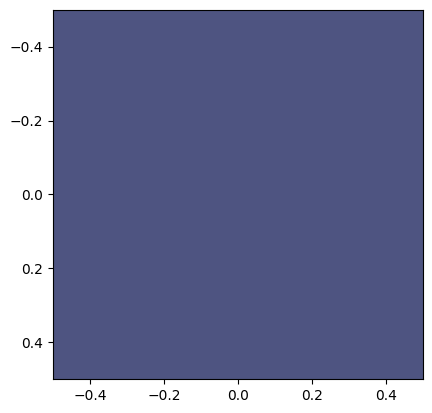

In [75]:
plt.imshow([[[78,  84, 129]]])
plt.show()

In [ ]:
def display_calib(f = "calib.json"):
    calib = json.load(open(f))
    for ind, j in enumerate(calib):
        print("position", ind)
        for i in ['w', 'y', 'r', 'o', 'b', 'g']:
            print(i, j[i])
            x = [j[i][2],j[i][1],j[i][0]]
            plt.imshow(np.array([[x]]))
            plt.show()

In [ ]:
def calibrate ():
    _ = cap_frame()
    delay = 2
    p0 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
    p1 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
    p2 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
    p3 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
    p4 = {'w':None, 'r':None, 'b':None, 'o':None, 'g':None, 'y':None}
    calib = [p0, p1, p2, p3, p4]


    #CORNER CALIB

    l,m,n = "o", "w", "g"
    for i in [0,1,2]:
        p0[l], p1[m], p2[n] = capture((0,1,2))
        sendserial("l u L U " * 2, delay=delay)
        l,m,n =  m,n,l

    sendserial("r r u", delay=delay)

    l,m,n = "r", "b", "y"
    for i in [0,1,2]:
        p0[l], p1[m], p2[n] = capture((0,1,2))
        sendserial("l u L U " * 2, delay=delay)
        l,m,n =  m,n,l

    sendserial("U r r", delay=delay)

    #EDGE CALIB


    p3['w'], p4['g'] = capture((3,4))
    sendserial("L U F", delay=delay)
    p3['g'], p4['w'] = capture((3,4))
    sendserial("f u l d L", delay=delay)


    p3['r'], p4['y'] = capture((3,4))
    sendserial("L U F", delay=delay)
    p3['y'], p4['r'] = capture((3,4))
    sendserial("f u l l D u F", delay=delay)

    p3['b'], p4['o'] = capture((3,4))
    sendserial("L U F", delay=delay)
    p3['o'], p4['b'] = capture((3,4))
    sendserial("f u l f U", delay=delay)


    json.dump(calib, open("calib.json", "w"), indent = 4)


    # cropped_img = frame[y[c]:y[c]+h[c], x[c]:x[c]+w[c]]
    # # colours[order[c]] = cropped_img
    # p0m = (np.mean(rgb2hsv(cropped_img), axis=(0, 1)).round().astype(int)).tolist()



In [ ]:
# calibrate()
display_calib()

## COMPLETE CALIBRATION DONE 

In [ ]:
display_calib()

In [ ]:
moves = "RRLLUUDDBBFF"

In [ ]:
sendserial(moves)

## Cube Read (cube_scan)


In [ ]:
def cube_scan():
    _ = cap_frame()
    delay = 1

    calib = json.load(open("calib.json"))


    configuration = ['*'] * 54

    configuration[4] = 'w'
    configuration[13] = 'r'
    configuration[22] = 'b'
    configuration[31] = 'o'
    configuration[40] = 'g'
    configuration[49] = 'y'


    def solve(pos, colour):
        pos_req = calib[pos]
        closest_d = 1000000000
        closest_c = None
        # print(colour)
        # print(pos_req)
        # print(pos_req.items())
        for clr, val in pos_req.items():
            # print(colour[0])
            # print(val[0])
            dist = (colour[0][0]-val[0])*(colour[0][0]-val[0]) + (colour[0][1]-val[1])*(colour[0][1]-val[1]) + (colour[0][2]-val[2])*(colour[0][2]-val[2])
            # print(dist,clr)
            if dist < closest_d:
                # print("asgn", dist,clr)

                closest_d = dist
                closest_c = clr

        # print("st",closest_c)
        # print("dist",closest_d)
        print(pos, closest_c)
        return(closest_c)



    positions = {
        37:0,
        49:0,
        13:0,
        21:0,
        17:0,
        41:0,
        33:0,
        29:0,
        0 :1,
        5 :1,
        7 :1,
        2 :1,
        51:1,
        57:1,
        59:1,
        53:1,
        43:2,
        11:2,
        27:2,
        39:2,
        47:2,
        31:2,
        23:2,
        19:2,
        3 :3,
        6 :3,
        4 :3,
        1 :3,
        54:3,
        52:3,
        56:3,
        58:3,
        34:3,
        14:3,
        28:3,
        22:3,
        46:4,
        12:4,
        24:4,
        38:4,
        44:4,
        18:4,
        26:4,
        32:4,
        42:4,
        48:4,
        16:4,
        36:4}

    # FRONT LAYER:


    configuration[33], configuration[0], configuration[38], configuration[3], configuration[41] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f", delay=delay)
    configuration[44], configuration[6], configuration[9], configuration[7], configuration[10] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f")
    configuration[11], configuration[8], configuration[24], configuration[5], configuration[21] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f")
    configuration[18], configuration[2], configuration[35], configuration[1], configuration[34] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f")

    # BACK LAYER:

    sendserial("ddrr", delay=delay)
    sendserial("lluu", delay=delay)
    configuration[15], configuration[45], configuration[42], configuration[48], configuration[39] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f", delay=delay)
    configuration[36], configuration[51], configuration[27], configuration[46], configuration[16] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f", delay=delay)
    configuration[29], configuration[53], configuration[20], configuration[50], configuration[23] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f", delay=delay)
    configuration[26], configuration[47], configuration[17], configuration[52], configuration[28] = solve(0, capture([0])), solve(1, capture([1])), solve(2, capture([2])), solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("f", delay=delay)
    sendserial("uull", delay=delay)
    sendserial("rrdd", delay=delay)

    # EDGES:

    sendserial("l", delay=delay)
    configuration[30], configuration[37] = solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("ll", delay=delay)
    configuration[12], configuration[43] = solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("luDf", delay=delay)
    configuration[25], configuration[14] = solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("ff", delay=delay)
    configuration[19], configuration[32] = solve(3, capture([3])), solve(4, capture([4])) 
    sendserial("fUd", delay=delay)

    final = ""
    for i in configuration:
        final += i
    final
    return(final)





In [ ]:
def cube_read():
    _ = cap_frame()
    delay = 1

    calib = json.load(open("calib.json"))

    configuration = ['*'] * 54
    configuration[4] = 'w'
    configuration[13] = 'r'
    configuration[22] = 'b'
    configuration[31] = 'o'
    configuration[40] = 'g'
    configuration[49] = 'y'


    def solve(pos, colour):
        pos_req = calib[pos]
        closest_d = 1000000000
        closest_c = None

        for clr, val in pos_req.items():
            dist = (colour[0]-val[0])*(colour[0]-val[0]) + (colour[1]-val[1])*(colour[1]-val[1]) + (colour[2]-val[2])*(colour[2]-val[2])
            if dist < closest_d:
                closest_d = dist
                closest_c = clr

        # print(pos, closest_c)
        return(closest_c)

    
    def saveconf(inds, msg):
        caps = capture([0, 1, 2, 3, 4])
        for i, j in enumerate(inds):
            if j < 0:
                continue
            configuration[j] = solve(i, caps[i])
        sendserial(msg, delay=delay)
        
    
    # FRONT LAYER:
    saveconf([33, 0, 38, 3, 41], "f")
    saveconf([44, 6, 9, 7, 10], "f")
    saveconf([11, 8, 24, 5, 21], "f")
    saveconf([18, 2, 35, 1, 34], "f")


    # BACK LAYER:
    sendserial("ddrrlluu", delay=delay)
    saveconf([15, 45, 42, 48, 39], "f")
    saveconf([36, 51, 27, 46, 16], "f")
    saveconf([29, 53, 20, 50, 23], "f")
    saveconf([26, 47, 17, 52, 28], "f")
    sendserial("uullrrddl", delay=delay)

    # EDGES:
    saveconf([-1, -1, -1, 30, 37], "ll")
    saveconf([-1, -1, -1, 12, 43], "luDf")
    saveconf([-1, -1, -1, 25, 14], "ff")
    saveconf([-1, -1, -1, 19, 32], "fUd")
    
    ret = "".join(configuration)
    return(ret)





In [ ]:
# calibrate()

In [ ]:
conf = cube_read()

In [ ]:
print(conf[0:9])
print(conf[9:18])
print(conf[18:27])
print(conf[27:36])
print(conf[36:45])
print(conf[45:])

In [ ]:
cb = rubik()

In [ ]:
conf

In [ ]:
cb.configure(conf)

In [ ]:
# cb

In [ ]:
"".join(sorted(list(conf)))

In [ ]:
# movs1

In [ ]:
cb.move(addspaces(moves))

In [ ]:
# expected = rubik()
# expected.move(addspaces(moves))
# expected.cube == cb.cube

In [ ]:
cb

In [ ]:
x = cb.solve()

In [ ]:
sln = x[1]
sln, len(sln)

In [ ]:
cb.move(addspaces(sln))

In [ ]:
cb

In [ ]:
cap_frame();

In [ ]:
for i in sln:
    print("", end = i)
    sendserial(i, serial_port = 'COM3', baud_rate = 9600, delay=0.1)


In [ ]:
sln, len(sln)

In [ ]:
sendserial("RR")

# Final

In [ ]:
positions = cube_scan()

In [ ]:
cb = rubik()
cb.configure(positions)
x = cb.solve()
sln = x[1]

In [ ]:
for i in sln:
    print("", end = i)
    sendserial(i, serial_port = 'COM3', baud_rate = 9600, delay=0.1)


In [ ]:
a = 'wwwwwwwwwrrrrrrrrrbbbbbbbbbooowooooogggggggggyyyyyyyyy'

In [ ]:
for i,j in enumerate(list(a)):
    print(i,j)

In [ ]:
final = cube_scan()

In [ ]:
final

In [ ]:
sendserial("R")

In [ ]:
c = rubik()

In [ ]:
# c.configure(final)

In [ ]:
c.move("r")

In [ ]:
x = c.solve()

In [ ]:
x[1], len(x[1])

In [ ]:
y = " ".join(list(x[1]))
y

In [ ]:
sendserial('F r D r U R U r u R F r u R U R f r d R')

sendserial('rDRFrurURfrURuruRdRf')

In [ ]:
c.move(y[:-2])

In [ ]:
c.movereverse('F r D r U R U r u R F r u R U R f r d R')

In [ ]:
x[1][97:]